Here we'll be poking around at some interesting bikeshare data from the SF bay area collected in 2014, 2015, and 2016. (Due to repository size limitations, we'll just use the 2014 data.) I'm specifically interested in any trends in "one-way" trips, where bikes are picked up at one location and dropped off at another, and whether there is any mass-migration of bikes that might build a need for transporting bikes back to another location.
This is a response to the "What do you see?" Thinkful challenge for the prep course. We'll see what we can see!
**PLEASE NOTE:**

I am very new to a lot of these tools, so everything in this notebook is pretty messy and not very rigorous at all. I might return to this topic later on with more experience. For now, forgive my sloppiness.

Data credit:
This data was taken from the Bay Area Bike Share program's Open Data source. Its data is open for public use:

http://www.bayareabikeshare.com/open-data

In [266]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
%matplotlib inline

In [267]:
a = pd.read_csv('201402_trip_data.csv')
df = a.append(pd.read_csv('201408_trip_data.csv'))

In [268]:
df

,Bike #,Duration,End Date,End Station,End Terminal,Start Date,Start Station,Start Terminal,Subscriber Type,Subscription Type,Trip ID,Zip Code
0,520,63,8/29/2013 14:14,South Van Ness at Market,66,8/29/2013 14:13,South Van Ness at Market,66,NaN,Subscriber,4576,94127
1,661,70,8/29/2013 14:43,San Jose City Hall,10,8/29/2013 14:42,San Jose City Hall,10,NaN,Subscriber,4607,95138
2,48,71,8/29/2013 10:17,Mountain View City Hall,27,8/29/2013 10:16,Mountain View City Hall,27,NaN,Subscriber,4130,97214
3,26,77,8/29/2013 11:30,San Jose City Hall,10,8/29/2013 11:29,San Jose City Hall,10,NaN,Subscriber,4251,95060
4,319,83,8/29/2013 12:04,Market at 10th,67,8/29/2013 12:02,South Van Ness at Market,66,NaN,Subscriber,4299,94103
5,527,103,8/29/2013 18:56,Golden Gate at Polk,59,8/29/2013 18:54,Golden Gate at Polk,59,NaN,Subscriber,4927,94109
6,679,109,8/29/2013 13:27,Adobe on Almaden,5,8/29/2013 13:25,Santa Clara at Almaden,4,NaN,Subscriber,4500,95112
7,687,111,8/29/2013 14:04,San Salvador at 1st,8,8/29/2013 14:02,San Salvador at 1st,8,NaN,Subscriber,4563,95112
8,553,113,8/29/2013 17:03,South Van Ness at Market,66,8/29/2013 17:01,South Van Ness at Market,66,NaN,Subscriber,4760,94103
9,107,114,8/29/2013 11:35,MLK Library,11,8/29/2013 11:33,San Jose City Hall,10,NaN,Subscriber,4258,95060


At first look, this data is *wonderfully* organized. I looked over several other data sets that were not nearly as nice and neat. This one should be very easy to work with.

To tackly my question, we'll look for a way to filter trips where the start and end terminals are different. (Note that "terminal" values are numbers that correspond to a unique station, where the "Station" fields have text names of the actual locations. We'll work with the station numbers for now for simplicity.)

We'll call our filtered data set "one-way trips," or owt, and another for round trips called rt.

In [269]:
owt = df[df['Start Terminal'] != df['End Terminal']]

In [270]:
rt = df[df['Start Terminal'] == df['End Terminal']]

I just want to make sure that these two data sets include all of our original trips:

In [271]:
len(df) == (len(owt) + len(rt))

True

Awesome.
Let's see what percentage of the trips were one way:

In [272]:
100 * len(owt) / len(df)

95.66032418534105

It appears that most of the trips in our data set are one way trips! (95.7%).

I want to look at "where the bikes are going." A simple way to visualize this data would be with a bar graph. I need to find a way to generate a list of bike station names and the count of each instance of each name in the "End Station" column... For that I will draw on a previous tool I used called collections.Counter (imported above).

In [273]:
dropoff_count = tuple((dict(Counter(owt['End Station']))).items()) #I boiled it into a tuple for order

With some help from the internet, I'll use matplotlib to come up with a simple bar graph for this information:

([<matplotlib.axis.XTick at 0x5d2a534c>,
 <a list of 73 Text xticklabel objects>)

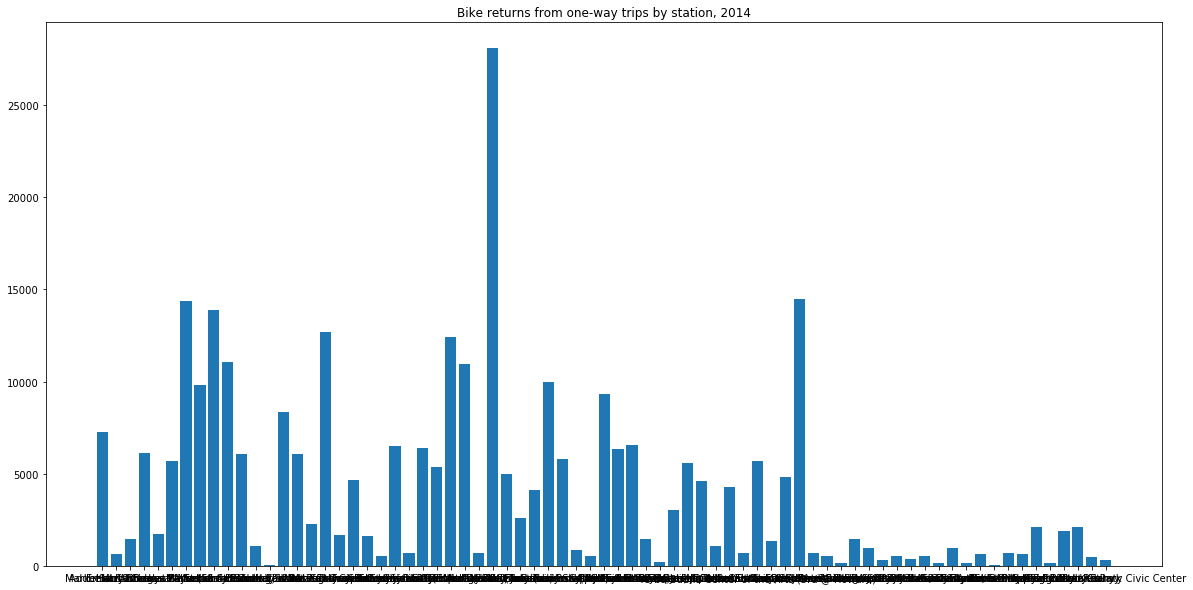

In [274]:
labels = [item[0] for item in dropoff_count]
values = [item[1] for item in dropoff_count]
plt.figure(figsize=(20, 10))
plt.title('Bike returns from one-way trips by station, 2014')
plt.bar(range(len(labels)), values, align = 'center')
plt.xticks(range(len(labels)), labels)

There is an obvious problem, namely that you can't read any of the tick labels!!! We can see, however, that there are some clear "winners", so let's filter out all the stations that get less than 10,000 bike returns:

In [275]:
filt_dropoff_count = tuple(filter(lambda item: item[1] > 10000, dropoff_count))

And we'll try again:

([<matplotlib.axis.XTick at 0x5ee1efac>,
 <a list of 8 Text xticklabel objects>)

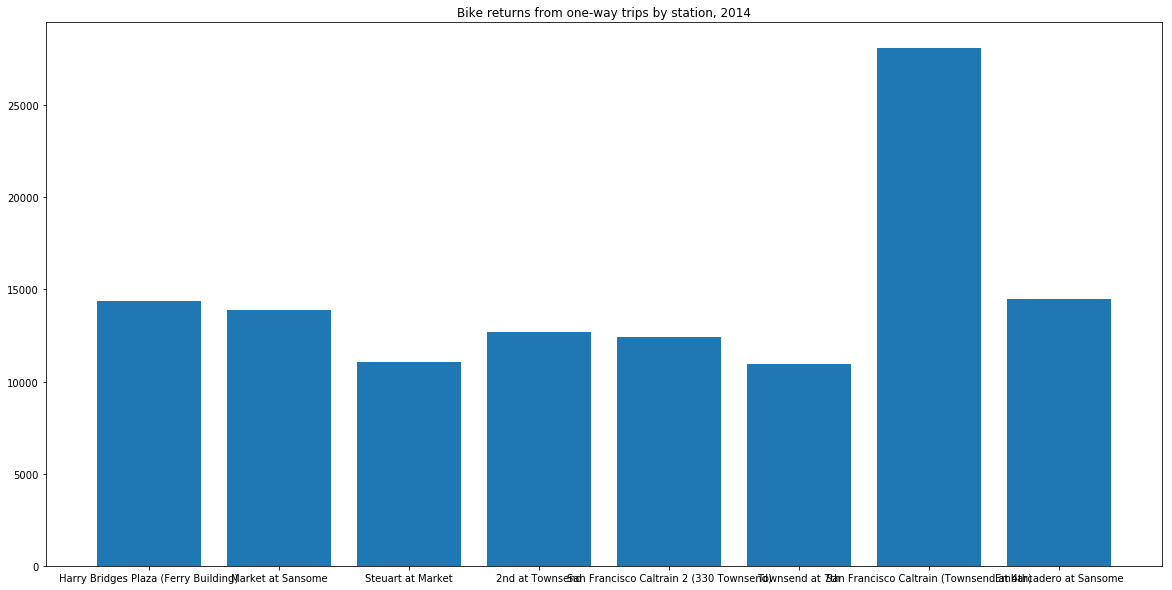

In [276]:
labels = [item[0] for item in filt_dropoff_count]
values = [item[1] for item in filt_dropoff_count]
plt.figure(figsize=(20, 10))
plt.title('Bike returns from one-way trips by station, 2014')
plt.bar(range(len(labels)), values, align = 'center')
plt.xticks(range(len(labels)), labels)

Still not readable. I want to know if there's a way to rotate my labels, but for the moment we'll just have to replace the station names with their numeric aliases and refer to them for empiricle analysis later on. We'll filter out stations with less than 10,000 returns.

([<matplotlib.axis.XTick at 0x5ea447cc>,
 <a list of 34 Text xticklabel objects>)

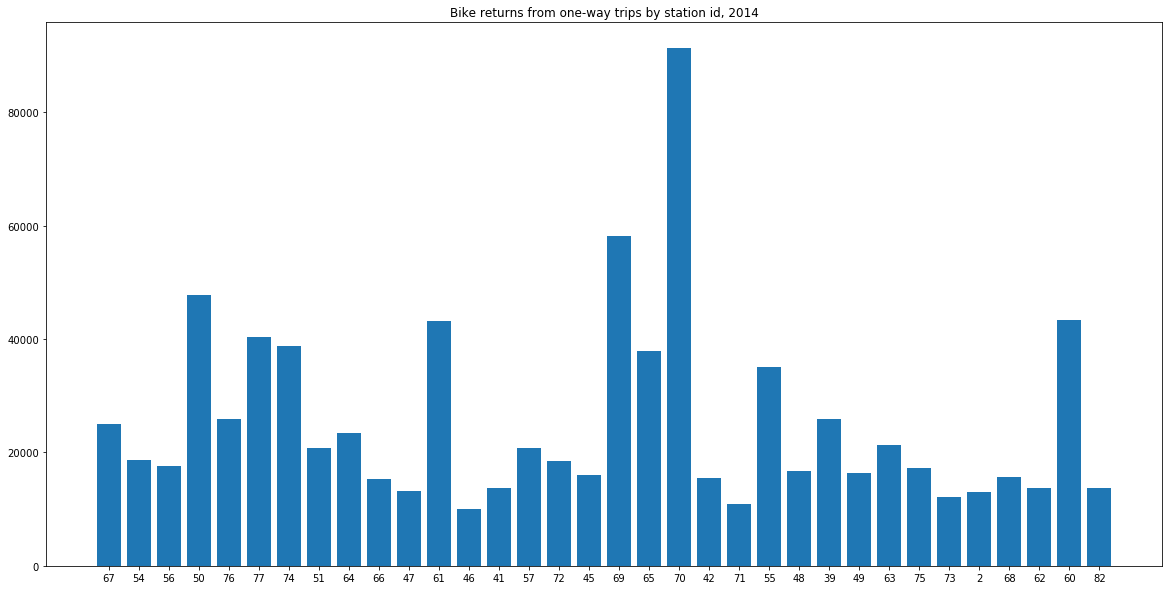

In [277]:
dropoff_count = tuple((dict(Counter(owt['End Terminal']))).items()) #Now referencing the "terminal" column
filt_dropoff_count = tuple(filter(lambda item: item[1] > 10000, dest_count))
labels = [item[0] for item in filt_dropoff_count]
values = [item[1] for item in filt_dropoff_count]
plt.figure(figsize=(20, 10))
plt.title('Bike returns from one-way trips by station id, 2014')
plt.bar(range(len(labels)), values, align = 'center')
plt.xticks(range(len(labels)), labels)

Now we finally have something we can read! Station #70 is by far the most popular place to return bikes after one-way trips. Luckily the data source has given us a very nice csv that correlates numbers with station names.

In [278]:
station_table = pd.read_csv('201608_station_data.csv')[0:67]

def give_station(label):
    row = station_table[station_table['station_id'] == label]
    return row['name']

In [279]:
give_station(70)

44    San Francisco Caltrain (Townsend at 4th)
Name: name, dtype: object

I think I could have found a way to get the station name with one line of code, but I'm still a little unclear on how to work with dataframes (lots to learn!)

The only balancing factor at first glance would be the number of one-way trips that begin at each station. Let's look at the stations where the most one-way trips begin:

([<matplotlib.axis.XTick at 0x5e9d994c>,
 <a list of 34 Text xticklabel objects>)

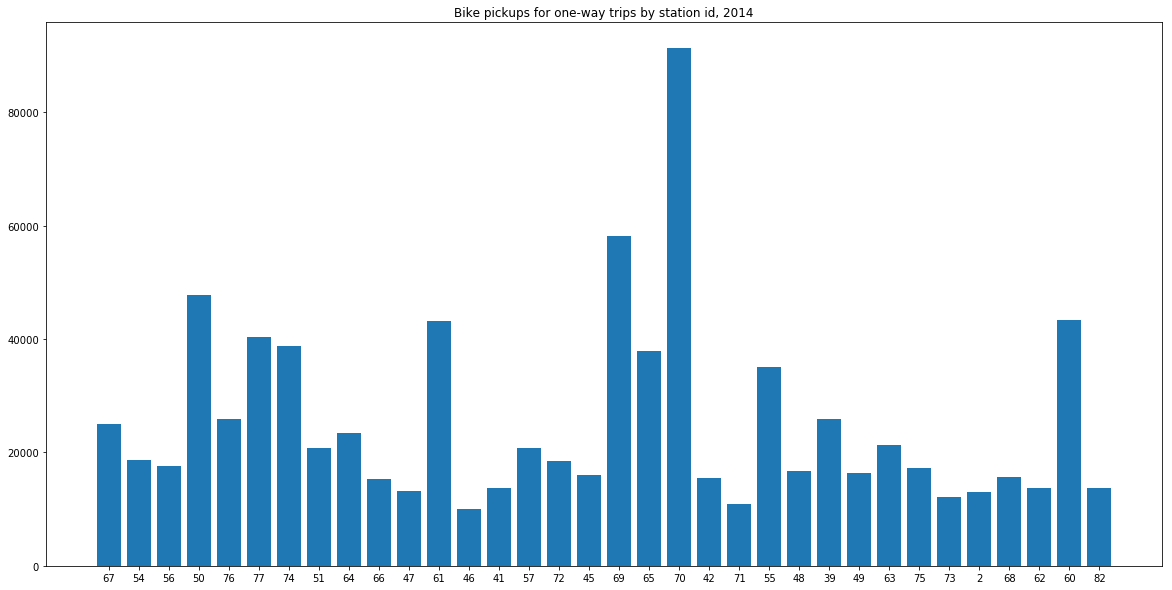

In [280]:
pickup_count = tuple((dict(Counter(owt['Start Terminal']))).items()) #Now referencing the "terminal" column
filt_pickup_count = tuple(filter(lambda item: item[1] > 10000, dest_count))
labels = [item[0] for item in filt_pickup_count]
values = [item[1] for item in filt_pickup_count]
plt.figure(figsize=(20, 10))
plt.title('Bike pickups for one-way trips by station id, 2014')
plt.bar(range(len(labels)), values, align = 'center')
plt.xticks(range(len(labels)), labels)

We can see here that station 70, the Townsend and 4th Caltrain station, is also the leader in bike pickups for one-way trips.
That's all fine and good, but my real question is about bike *displacement*. That is, the number of bikes that move from one place to another in one-way trips. We can define total bike displacement by station by subtracting the number of bikes picked up from the number of bikes dropped off:

In [281]:
bike_displacement = []
for itemx in dest_count:
    for itemy in orig_count:
        if itemx[0] == itemy[0]:
            bike_displacement.append((itemx[0], itemx[1]-itemy[1]))
            
    
    

Now that we have a notion of "bike displacement" by station, let's plot that information and see which stations lose the most bikes:
We'll filter out stations with an absolute displacement less than 5000:

([<matplotlib.axis.XTick at 0x5d29c3ec>,
 <a list of 7 Text xticklabel objects>)

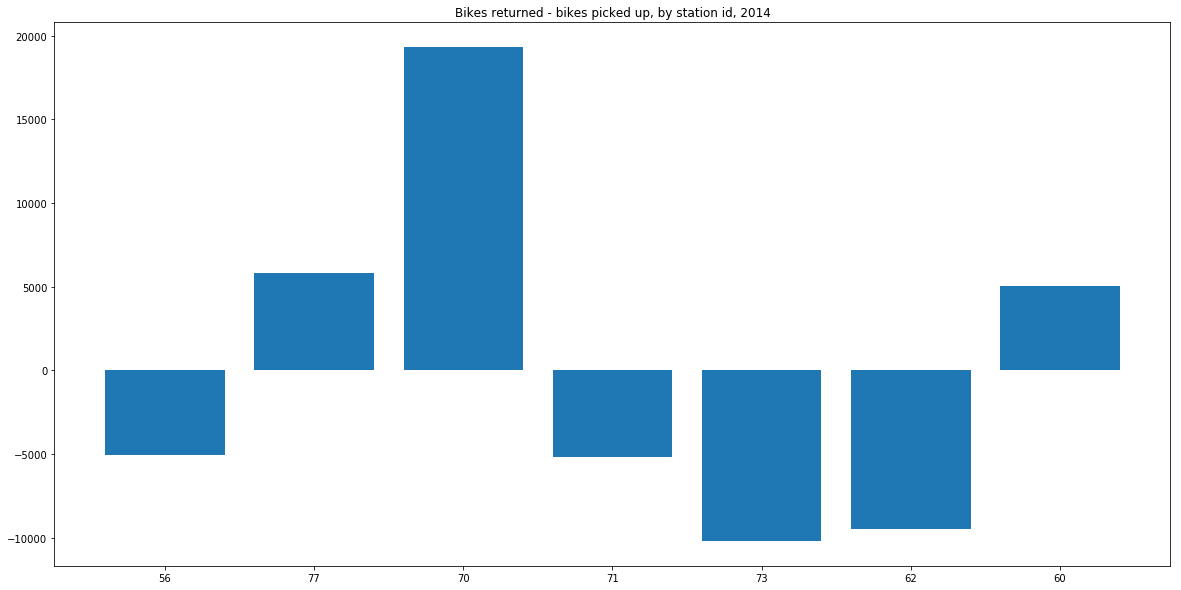

In [282]:
filt_displacement = tuple(filter(lambda item: abs(item[1]) > 5000, bike_displacement))
labels = [item[0] for item in filt_displacement]
values = [item[1] for item in filt_displacement]
plt.figure(figsize=(20, 10))
plt.title('Bikes returned - bikes picked up, by station id, 2014')
plt.bar(range(len(labels)), values, align = 'center')
plt.xticks(range(len(labels)), labels)

So we see that station id 70, the caltrain station at 4th and Townsend, is actually gaining bikes over time. To explore this topic further, we should break these figures down by month and day. The data source also includes weather data and customer data, so there are a lot of factors for us to look at.
However, this information is enough to let us make sweeping generalizations about where bikes need to be going, if there is a need to move bikes based on supply. It looks like there is a general trend of bikes going to station 70, but they seem to be leaving station 73. Where is that?

In [283]:
give_station(73)

47    Grant Avenue at Columbus Avenue
Name: name, dtype: object

So, if bikes tend to collect at the Caltrain station at 4th and Townsend and leave the Grant and Columbus station, the bike share program probably ends up moving bikes from station 70 to station 73 ocassionaly. Of course, this is just a very general analysis over an entire year, so bike movement by month may look different.
However, if we look deeper into this data and see that the trend holds up month-to-month, the bike share program COULD think about incentivizing riders to make one way trips from station 70 to station 73 with, say, discounted memberships or rentals. Maybe a credit to a rider's account if this one-way trip is made. The company could look at the cost of moving bikes and figure out exactly what the value of this trip is, and credit that amount to any riders who complete such a trip. There is further environmental value in the carbon emissions, energy conserved, etc. if the program can find a way to get riders to move the bikes rather than spending energy resources on trucking bikes across town.
It would be interesting to look into this further!